<a href="https://colab.research.google.com/github/zaephaer/AutoML/blob/main/ml_project_3_diabetes_lazypredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#loading dataset directly from Google Drive
url = 'https://drive.google.com/file/d/1riLxaaoXnSl4YJvmnhz876Xjaz0i7-bN/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


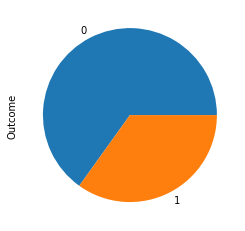

In [ ]:
# Using pie chart we can see that both Target is almost balance
df['Outcome'].value_counts().plot.pie()

In [ ]:
# Using resample method to balance datase
from sklearn.utils import resample

# Temporary created divided class dataset
safe = df[df["Outcome"] == 0]
unsafe = df[df["Outcome"] == 1]

# Created temp df with both class, with same amount of data
upsampled = resample(unsafe, replace=True, n_samples=len(safe), random_state=33)

# Concat
upsampled = pd.concat([safe, upsampled])

# Check new balance class
upsampled["Outcome"].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

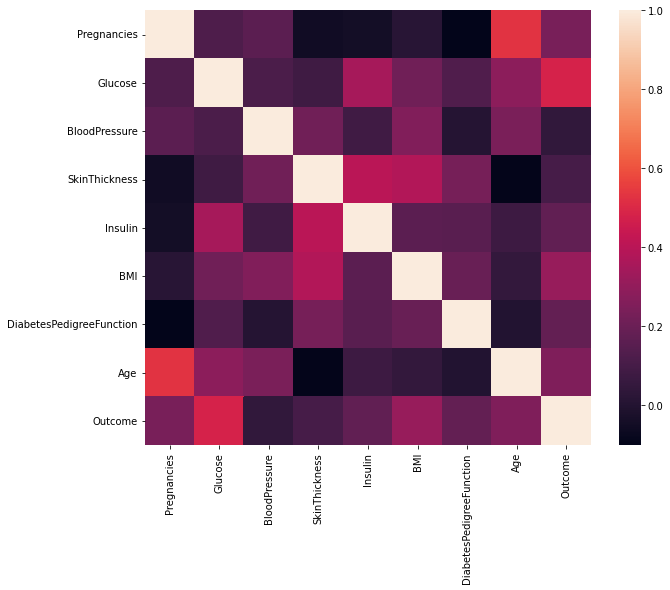

In [ ]:
# Examine correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(upsampled.corr())

In [ ]:
# Ranking Correlation of Target with Feature 
upsampled.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.481582
BMI                         0.312400
Age                         0.254963
Pregnancies                 0.236141
DiabetesPedigreeFunction    0.179799
Insulin                     0.175504
SkinThickness               0.104262
BloodPressure               0.044512
Name: Outcome, dtype: float64

In [ ]:
# Splitting dataset
X = upsampled.drop(['Outcome'], axis=1)
y = upsampled['Outcome']

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(f'X_train shape   : {X_train.shape}')
print(f'X_test shape    : {X_test.shape}')
print(f'y_train shape   : {y_train.shape}')
print(f'y_test shape    : {y_test.shape}')

X_train shape   : (800, 8)
X_test shape    : (200, 8)
y_train shape   : (800,)
y_test shape    : (200,)


In [ ]:
pip install lazypredict

In [ ]:
# Using Lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:07<00:00,  3.97it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.88               0.88     0.88      0.88   
RandomForestClassifier             0.87               0.87     0.87      0.87   
DecisionTreeClassifier             0.86               0.86     0.86      0.86   
XGBClassifier                      0.86               0.86     0.86      0.86   
LGBMClassifier                     0.85               0.86     0.86      0.85   
BaggingClassifier                  0.84               0.84     0.84      0.84   
LabelPropagation                   0.81               0.81     0.81      0.80   
LabelSpreading                     0.81               0.81     0.81      0.80   
ExtraTreeClassifier                0.81               0.81     0.81      0.80   
AdaBoostClassifier                 0.79               0.79     0.79      0.78   
SVC                         

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.86


In [ ]:
# make a single prediction
row = [[1,85,66,29,0,26.6,0.351,31]]    # Row[1] - Outcome = 0	
#row = [[8,183,64,0,0,23.3,0.672,32]]     # Row[2] - Outcome = 1
yhat = clf.predict(row)
print('Predicted Class: %d' % yhat[0])

if (yhat[0] == 0):
  print('The person is NOT having diabetic')
else:
  print('The person is HAVING diabetic')

Predicted Class: 0
The person is NOT having diabetic
